In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
relief = pd.read_csv('ReliefPitching_CLEAN.csv', float_precision = 'round_trip')
relief

,Year,Tm,G,GR,GF,Wgr,Lgr,SVOpp,SV,BSv,...,Bhd,Runr,Empt,>3o,<3o,IPmult,0DR,Out/GR,Pit/GR,Playoff
0,2000,Anaheim Angels,162,441,157,29,24,68,46,22,...,201,168,273,169,124,186,95,3.8,21,0
1,2000,Arizona Diamondbacks,162,390,146,23,24,56,38,18,...,169,129,261,120,111,140,72,3.4,19,0
2,2000,Atlanta Braves,162,376,149,19,18,67,53,14,...,142,112,264,91,101,95,81,3.2,18,1
3,2000,Baltimore Orioles,162,396,148,22,21,57,33,24,...,166,145,251,99,125,119,84,3.3,19,0
4,2000,Boston Red Sox,162,425,155,29,23,66,46,20,...,173,137,288,181,91,191,80,4.0,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,2021,St. Louis Cardinals,162,557,159,36,25,71,50,21,...,217,167,390,123,148,155,99,3.1,18,1
626,2021,Tampa Bay Rays,162,531,161,58,32,64,42,22,...,134,126,405,182,89,198,73,4.0,21,1
627,2021,Texas Rangers,162,507,162,27,31,51,31,20,...,269,143,364,144,98,162,50,3.7,21,0
628,2021,Toronto Blue Jays,162,537,161,30,31,52,34,18,...,208,167,370,136,136,167,63,3.2,18,0


In [3]:
# preparing the data for visualization
relief['Playoff_YN'] = relief['Playoff'].replace(to_replace=[0, 1], value=['No', 'Yes'])
relief.Playoff_YN = relief.Playoff_YN.astype('category')
relief

,Year,Tm,G,GR,GF,Wgr,Lgr,SVOpp,SV,BSv,...,Runr,Empt,>3o,<3o,IPmult,0DR,Out/GR,Pit/GR,Playoff,Playoff_YN
0,2000,Anaheim Angels,162,441,157,29,24,68,46,22,...,168,273,169,124,186,95,3.8,21,0,No
1,2000,Arizona Diamondbacks,162,390,146,23,24,56,38,18,...,129,261,120,111,140,72,3.4,19,0,No
2,2000,Atlanta Braves,162,376,149,19,18,67,53,14,...,112,264,91,101,95,81,3.2,18,1,Yes
3,2000,Baltimore Orioles,162,396,148,22,21,57,33,24,...,145,251,99,125,119,84,3.3,19,0,No
4,2000,Boston Red Sox,162,425,155,29,23,66,46,20,...,137,288,181,91,191,80,4.0,21,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,2021,St. Louis Cardinals,162,557,159,36,25,71,50,21,...,167,390,123,148,155,99,3.1,18,1,Yes
626,2021,Tampa Bay Rays,162,531,161,58,32,64,42,22,...,126,405,182,89,198,73,4.0,21,1,Yes
627,2021,Texas Rangers,162,507,162,27,31,51,31,20,...,143,364,144,98,162,50,3.7,21,0,No
628,2021,Toronto Blue Jays,162,537,161,30,31,52,34,18,...,167,370,136,136,167,63,3.2,18,0,No


# Figure 1

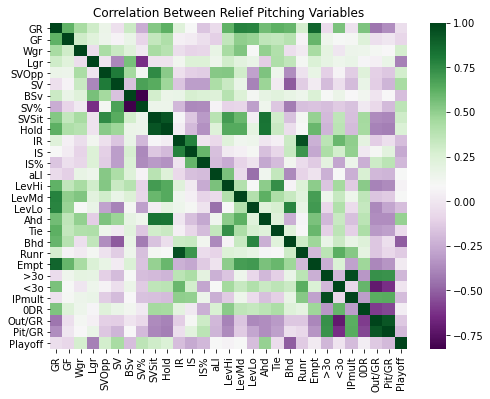

In [4]:
HMrelief = relief.drop(['Tm', 'Year', 'G', 'Playoff_YN'], pltis = 1)
plt.figure(figsize = (8, 6))
sns.heatmap(HMrelief.corr(), cmap = 'PRGn')
plt.title('Correlation Between Relief Pitching Variables')
plt.show()

# Figure 2

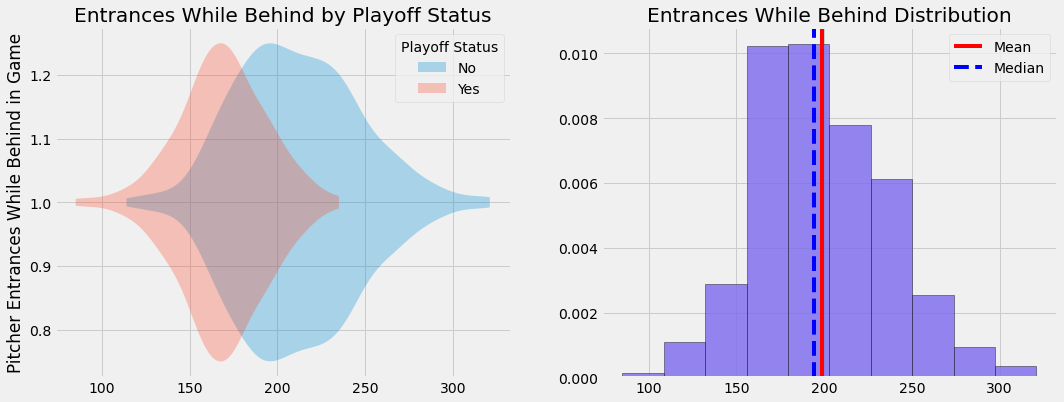

In [5]:
plt.style.use('fivethirtyeight')
fig, (plt1, plt2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))
plt1.violinplot(relief.loc[relief.Playoff_YN == 'No', 'Bhd'], showextrema = False, vert = False)
plt1.violinplot(relief.loc[relief.Playoff_YN == 'Yes', 'Bhd'], showextrema = False, vert = False)
plt1.set_ylabel('Pitcher Entrances While Behind in Game')
plt1.set_title('Entrances While Behind by Playoff Status')
plt1.legend(['No', 'Yes', 'c', 'd'], title = 'Playoff Status')
plt2.hist(relief['Bhd'], color = 'mediumslateblue', alpha = 0.8, edgecolor = 'black', density = True)
plt2.pltvline(relief.loc[:, 'Bhd'].mean(), color = 'r', label = 'Mean')
plt2.pltvline(relief.loc[:, 'Bhd'].median(), color = 'b', linestyle = '--', label = 'Median')
plt2.legend()
plt2.set_title('Entrances While Behind Distribution')
plt.show()

# Figure 3

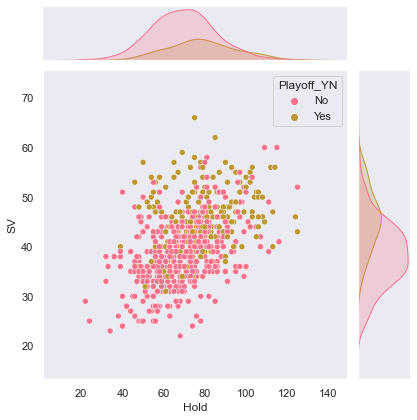

In [6]:
sns.set_theme(style = 'dark', palette = 'husl')
sns.jointplot(data = relief, x = 'Hold', y = 'SV', hue = 'Playoff_YN')
plt.show()

# Figure 4

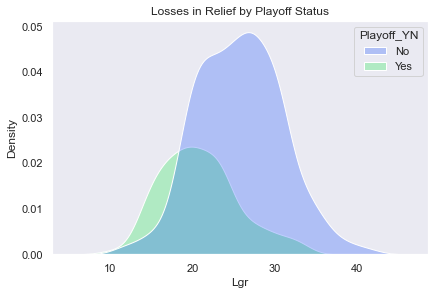

In [7]:
plt.style.use('seaborn-bright')
sns.kdeplot(data = relief, x = 'Lgr', hue = 'Playoff_YN', shade = True, edgecolor = None)
plt.title('Losses in Relief by Playoff Status')
plt.show()

# Figure 5

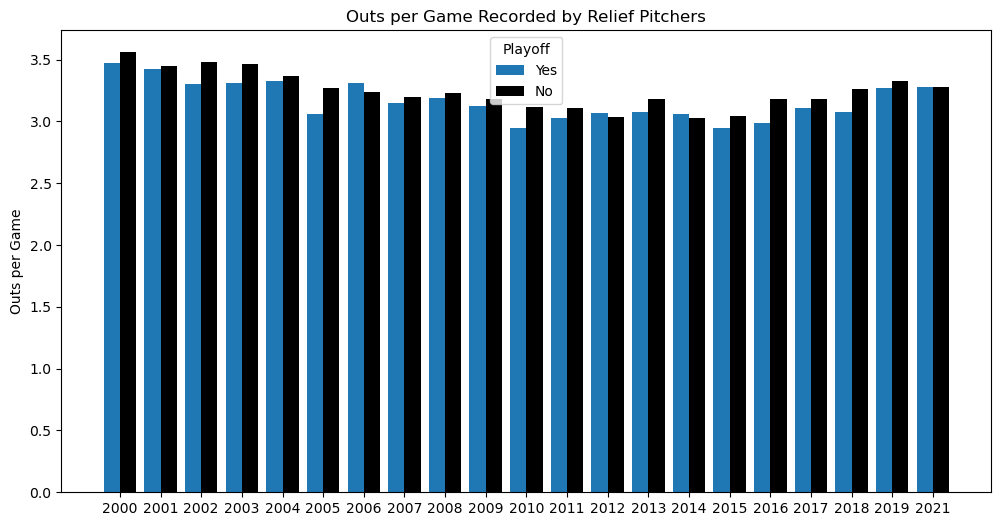

In [62]:
BARrelief = relief.groupby(['Year', 'Playoff_YN'])['Out/GR'].mean()
labels = list(np.delete(np.arange(2000, 2022).astype('str'), 20))
yes_means = list(BARrelief[:, 'Yes'])
no_means = list(BARrelief[:, 'No'])

x = np.arange(len(labels))  # the label locations
width = 0.4 # the width of the bars

plt.figure(figsize = (12, 6))
plt.style.use('default')
plt.tight_layout()
plt.bar(x - width/2, yes_means, width, label='Yes')
plt.bar(x + width/2, no_means, width, label='No', color = 'k')
plt.ylabel('Outs per Game')
plt.title('Outs per Game Recorded by Relief Pitchers')
plt.xticks(x, labels)
plt.legend(title = 'Playoff')
plt.show()